## importing important libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",300)
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn= pd.read_csv('telecom_churn_data (1).csv')

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn.shape

(99999, 226)

In [5]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
#creating copy of data so we will not miss any data
churn_1=churn.copy()

In [7]:
# Getting the columns which has a single value repeated over entire column
# empty list unique_col for storing column names
unique_col=[]
# running the loop for all the columns in the DataFrame
for i in churn.columns:
#     Counting number of distinct elements in column wise axis.
    if churn[i].nunique() == 1:   # check if there is just one unique value
        unique_col.append(i)  #  if yes then add that column in list
    else:
        pass # if its more than one unique values then leave it

churn.drop(unique_col, axis=1, inplace = True)
print("\n Columns whcih are dropped from the DataFrame\n", unique_col)
print("\nnumber of columns dropped = ", len(unique_col))


 Columns whcih are dropped from the DataFrame
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

number of columns dropped =  16


In [8]:
# Returning a subset of the DataFrame’s columns based on the column dtypes of object.

date_col= churn.select_dtypes(include=['object'])
print("\nFollowing columns was misrepresented as object\n",date_col.columns)

# Converting the columns of date_col to datetime format
for i in date_col.columns:
    churn[i] = pd.to_datetime(churn[i])



Following columns was misrepresented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [9]:
# confirming the conversion of dtype
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

## Handling Missing value


In [10]:
# Missing value ratio in each column ordered in descing order of count
(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

max_rech_data_6             74.846748
fb_user_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_7                   74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
count_rech_2g_7             74.428744
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
fb_user_9                   74.077741
total_rech_data_9           74.077741
max_rech_data_9             74.077741
night_pck_us

In [11]:
# Checking the related columns values with count recharge attributes
churn[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,0.0,1.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


As we can see that when there is no data in total_rech_data_6 then count_rech_2g_6 and count_rech_3g_6 are also missing which shows that the customer has not made a internet recharge
Also, we can see that the total of count_rech_2g_6 and count_rech_3g_6 gives total_rech_data_6
Therefore, we will drop the count_rech_2g_6 and count_rech_3g_6as it causes the multicollinearity issue.
Also doing for all values for all such cases in month 6, 7, 8 and 9

In [12]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
churn.drop(['count_rech_2g_6', 'count_rech_3g_6',
       'count_rech_2g_7','count_rech_3g_7',
       'count_rech_2g_8','count_rech_3g_8',
       'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [13]:
# Checking new dimensions of the DataFrame after dropping.
churn.shape

(99999, 202)

In [14]:
# Checking the correlation between the "arpu_3g", "arpu_2g", "av_rech_amt_data" columns for months 6,7,8 and 9
print("Correlation table for month 6\n\n", churn[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", churn[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", churn[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", churn[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

As we can see that there is very high correlation between arpu_2g_* and arpu_3g_* with av_rech_amt_data*
Therefore, we will drop the arpu_2g_* and arpu_3g_* as it causes the multicollinearity issue.
Also doing for all values for all such cases in month 6, 7, 8 and 9

In [15]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the DataFrame
churn.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [16]:
#checking the shape
churn.shape

(99999, 194)

In [17]:
churn.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

In [18]:
#checking the shape
churn.shape

(99999, 186)

In [19]:
# Code for conditional imputation
for i in range(len(churn)):
  # Imputing `av_rech_amt_data`  for month 6
    if (pd.isnull(churn['av_rech_amt_data_6'][i]) and (churn['total_rech_data_6'][i]==0)):
        churn['av_rech_amt_data_6'][i] = 0

  # Imputing `av_rech_amt_data`  for month 7
    if (pd.isnull(churn['av_rech_amt_data_7'][i]) and (churn['total_rech_data_7'][i]==0)):
        tc['av_rech_amt_data_7'][i] = 0

  # Imputing `av_rech_amt_data`  for month 8
    if (pd.isnull(churn['av_rech_amt_data_8'][i]) and (churn['total_rech_data_8'][i]==0)):
        churn['av_rech_amt_data_8'][i] = 0

  # Imputing `av_rech_amt_data`  for month 9
    if (pd.isnull(churn['av_rech_amt_data_9'][i]) and (churn['total_rech_data_9'][i]==0)):
        churn['av_rech_amt_data_9'][i] = 0

In [20]:
# Detecting the missing values in the DataFrame
((churn.isnull().sum()/churn.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
isd_ic_mou_9                 7.75
loc_og_mou_9                 7.75
spl_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
std_og_t2m_mou_9             7.75
std_og_t2f_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_og_mou_9                 7.75
std_ic_t2m_mou_9             7.75
isd_og_mou_9                 7.75
std_ic_t2t_mou_9             7.75
spl_og_mou_9                 7.75
og_others_9                  7.75
loc_ic_mou_9  

In [21]:
# Dropping the columns related to datetime dtype from the DataFrame
churn.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



In [22]:
# Dropping the columns related to datetime dtype from the DataFrame
churn.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [23]:
# Checking new dimensions of the DataFrame after dropping.
churn.shape

(99999, 178)

In [24]:
x = pd.DataFrame(round(100 * churn.isnull().sum() / len(churn),2)).reset_index()
x.columns = ['Columns','PercentageNull']
x

,Columns,PercentageNull
0,mobile_number,0.00
1,arpu_6,0.00
2,arpu_7,0.00
3,arpu_8,0.00
4,arpu_9,0.00
5,onnet_mou_6,3.94
6,onnet_mou_7,3.86
7,onnet_mou_8,5.38
8,onnet_mou_9,7.75
9,offnet_mou_6,3.94


In [25]:
##Imputing the Missing Values Using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
cols = list(x.Columns)
churn[cols] = imputer.fit_transform(churn[cols])

In [26]:
(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

mobile_number         0.0
last_day_rch_amt_6    0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_9      0.0
spl_ic_mou_6          0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9

In [27]:
churn.shape

(99999, 178)

## high value customer

### To extract the top Custormers, abov 70th percentile of the avg total recharge amount of month 6 and 7

In [28]:
# calculating the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] =churn.total_rech_data_7 * churn.av_rech_amt_data_7


In [29]:
# total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn['total_rech_amt_6'] + churn['total_data_rech_6']
churn['amt_data_7'] = churn['total_rech_amt_7'] + churn['total_data_rech_7']



In [30]:
# calculating average recharge done by customer in June and July
churn['avg_amt_6_7'] = churn[['amt_data_6','amt_data_7']].mean(axis=1)
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [123]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

AttributeError: 'DataFrame' object has no attribute 'av_amt_data_6_7'

In [32]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered= churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_fitered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30050, 184)

# derive churn

In [ ]:
#Tag churners and remove attributes of the churn phase
churn = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_filtered[churn].describe()

In [ ]:
churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if ((x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) & (x.vol_2g_mb_9 == 0) & (x.vol_3g_mb_9 == 0)) else 0, axis = 1)
 

In [ ]:
print('percentages of churn and non-churn:',100 * (churn_filtered['churn'].value_counts()) / len(churn_filtered))


It is observerd that there is class imbalance in dataset, around 92% custormers have not churned and 8% of the custormers have churned, hence imblace in the dataset must be considered while building up an ML model

In [ ]:
churn_phase = list()
for i in list(churn_filtered.columns):
    if (i[-1] == '9'):
        churn_phase.append(i)
    else:
        continue
print(churn_phase)

In [ ]:
churn_filtered.drop(churn_phase,inplace = True, axis = 1)

In [ ]:
churn_filtered.head()

In [ ]:
churn_filtered.shape

Calculate the difference between the 8th month and the avergae of the 6th and the 7th month

In [ ]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered['max_rech_data_diff'] = churn_filtered.max_rech_data_8 - ((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered['av_rech_amt_data_diff'] = churn_filtered.av_rech_amt_data_8 - ((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

In [ ]:
# Dropping the unwanted columns
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [ ]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [ ]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_filtered_corr =churn_filtered.corr()
churn_filtered_corr.loc[:,:] = np.tril(churn_filtered_corr, k=-1)
churn_filtered_corr = churn_filtered_corr.stack()
churn_filtered_corr
churn_filtered_corr[(churn_filtered_corr > 0.80) | (churn_filtered_corr < -0.80)].sort_values(ascending=False)

In [ ]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
# Checking new dimensions of the DataFrame after dropping.
churn_filtered.shape

# Exploratory Data Analysis

In [ ]:
converted= churn_filtered["churn"].value_counts()
churn= pd.DataFrame({"values":converted.values})
churn.plot.pie(subplots=True,autopct="%1.0f%%")

In [ ]:
#Some important features
#Create Bar Plot
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'arpu_6', data = churn_filtered)
plt.subplot(2,3,2)
plt.ylabel('Av Rev. Month 7')
sns.barplot(x = 'churn', y = 'arpu_7', data = churn_filtered)
plt.subplot(2,3,3)
plt.ylabel('Av Rev. Month 8')
sns.barplot(x = 'churn', y = 'arpu_8', data =churn_filtered)

observation : arpu indicate average revenue per user from above graph we can see that average revenue per person decreases in 8th month because of number of churn customer increases.

In [ ]:
#Create Bar Plot
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn', y = 'total_og_mou_6', data = churn_filtered)
plt.subplot(2,3,2)
sns.barplot(x = 'churn', y = 'total_og_mou_7', data = churn_filtered)
plt.subplot(2,3,3)
sns.barplot(x = 'churn', y = 'total_og_mou_8', data =churn_filtered)

Observation: Total outgoing calls timing in minutes is denoted by total_og_mou as we can observed from above graph that number of outgoing call minutes drop in 8th month it indicates churn.

Observation : Total incoming calls timing in minutes is denoted by total_ic_mou as we can observed from above graph that number of incoming call minutes drop in 8th month it indicates churn.

In [ ]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array
        


In [ ]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

In [ ]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

In [ ]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_filtered)
plt.show()

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [ ]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

In [ ]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# Checking new dimensions of the DataFrame after dropping.
churn_filtered.shape

In [ ]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

## Modelling

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(churn_filtered[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()


In [ ]:
# Adding the results to the master dataframe
churn_filtered = pd.concat([churn_filtered, dummy], axis=1)
churn_filtered.head()

In [ ]:
# Creating a copy of the filtered dataframe

churn_2=churn_filtered[:].copy()
# Dropping unwanted columns
churn_filtered.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [ ]:
# change churn to numeric
churn_filtered['churn'] = pd.to_numeric(churn_filtered['churn'])

In [ ]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42,stratify=y)

In [ ]:
y.value_counts(normalize=True).to_frame()

In [ ]:
X_train.shape,X_test.shape

In [ ]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()


In [ ]:
# apply scaling on the DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

Handling Class Imbalance
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)



In [ ]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)



In [ ]:
# Visualizing the  counts of unique rows in the y_train_sm of the DataFrame

pd.DataFrame(y_train_sm).value_counts().plot(kind ='bar').set_title('churned')

# logistic Regression

In [ ]:

# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
for col in X_train.columns:
    print(col + " : " + str(np.isinf(X_train[col]).sum())) # Checking if any column has infinite value so that later it doesn't cause any issue

In [ ]:
#Logistic Regression using Feature Selection (RFE method)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
# changed it here
# considering for all the 
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
rfe.support_

In [ ]:
col=X_train_sm.columns[rfe.support_]
print(col)

In [ ]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

In [ ]:
col=col.drop(['arpu_diff','total_rech_amt_diff','total_rech_num_diff','total_ic_mou_diff'],1)

In [ ]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[col])
logm3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
vifcalc(X_train[col])

In [ ]:
col=col.drop(['loc_ic_mou_8','loc_ic_t2m_mou_8'],1)

In [ ]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[col])
logm4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
vifcalc(X_train[col])

In [ ]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

In [ ]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

In [124]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.771170,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.002559,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.491375,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.850218,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [127]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[14579  4681]
 [ 2650 16610]]


In [128]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8096832814122533


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8624091381100727
Specificity =  0.7569574247144341
False Positive Rate =  0.24304257528556594
Precision =  0.7801418439716312
True Negative Prediction Rate =  0.8461895641070288


In [131]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
#Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

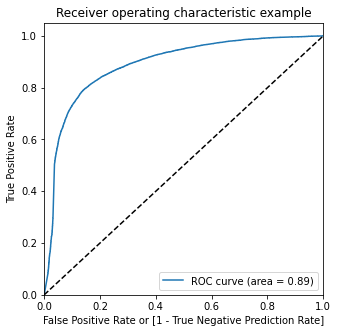

In [133]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [134]:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.771170,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.002559,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.491375,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.850218,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [135]:
#now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.680945     0.971184     0.390706
0.2          0.2  0.729206     0.947923     0.510488
0.3          0.3  0.763629     0.925961     0.601298
0.4          0.4  0.788525     0.897664     0.679387
0.5          0.5  0.809683     0.862409     0.756957
0.6          0.6  0.822949     0.817705     0.828193
0.7          0.7  0.818302     0.746366     0.890239
0.8          0.8  0.774169     0.600623     0.947715
0.9          0.9  0.500000     0.000000     1.000000


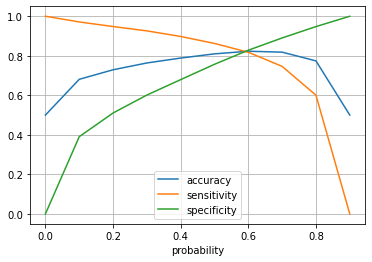

In [136]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

plt.grid()

In [137]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.771170,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.002559,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.491375,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.850218,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.54,0.55,0.56,0.57,0.58,0.59,0.6]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.54         0.54  0.815966     0.846469     0.785462
0.55         0.55  0.818069     0.842627     0.793510
0.56         0.56  0.818718     0.837591     0.799844
0.57         0.57  0.819678     0.832710     0.806646
0.58         0.58  0.820742     0.827882     0.813603
0.59         0.59  0.821937     0.822845     0.821028
0.60         0.60  0.822949     0.817705     0.828193


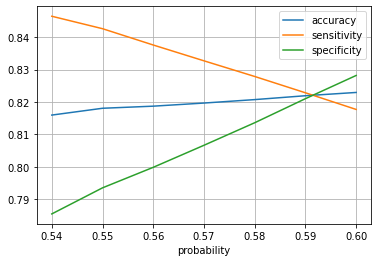

In [139]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

plt.grid()

In [140]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.771170,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.002559,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.001626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.491375,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.850218,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [141]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8159657320872274


In [142]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[15128  4132]
 [ 2957 16303]]


In [143]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8464693665628245
Specificity =  0.7854620976116303
False Positive Rate =  0.21453790238836967
Precision =  0.7977978957670663
True Negative Prediction Rate =  0.8364943323196019


# Precision and recall tradeoff

In [144]:
from sklearn.metrics import precision_recall_curve

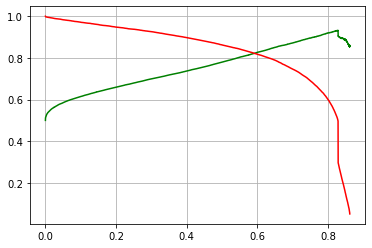

In [145]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.grid()

## Making predictions on the test set

### Transforming and feature selection for test data

In [146]:




# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

KeyError: "['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'avg_amt_6_7', 'av_amt_data_6_7', 'arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_diff', 'std_og_mou_diff', 'isd_og_mou_diff', 'spl_og_mou_diff', 'total_og_mou_diff', 'loc_ic_mou_diff', 'std_ic_mou_diff', 'isd_ic_mou_diff', 'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff', 'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff', 'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff', 'avg_arpu_6_7'] not in index"

In [147]:
# Feature selection
X_test=X_test[col]
X_test.head()

,loc_og_t2m_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g
84284,0.089943,0.027703,0.000000,0.224,0.029220,0.000000,0.000000,0.0,0.000000
69639,0.114560,0.036045,0.009178,0.000,0.056642,0.050847,0.004408,0.0,0.129294
76071,0.011378,0.000000,0.000585,0.000,0.000000,0.000000,0.000000,0.0,0.000000
3318,0.094313,0.036028,0.023884,0.000,0.123623,0.000000,0.004587,0.0,0.038584
95547,0.054858,0.016315,0.035561,0.000,0.029220,0.000000,0.000000,0.2,0.000000


In [148]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [149]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 84284    0.033106
69639    0.001482
76071    0.828753
3318     0.007943
95547    0.033937
40642    0.563094
51933    0.178218
36925    0.669200
58371    0.573242
57820    0.507672
dtype: float64


In [150]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
84284,0.033106
69639,0.001482
76071,0.828753
3318,0.007943
95547,0.033937


In [151]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [152]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
84284,0
69639,0
76071,1
3318,0
95547,0


In [153]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
84284,0,0.033106
69639,0,0.001482
76071,1,0.828753
3318,0,0.007943
95547,0,0.033937


In [154]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
84284,0,0.033106,0
69639,0,0.001482,0
76071,1,0.828753,1
3318,0,0.007943,0
95547,0,0.033937,0


In [155]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.778702163061564

In [156]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6410 1845]
 [ 150  610]]


In [157]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8026315789473685
Specificity =  0.7764990914597214
False Positive Rate =  0.22350090854027863
Precision =  0.2484725050916497
True Negative Prediction Rate =  0.9771341463414634


In [159]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  78.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



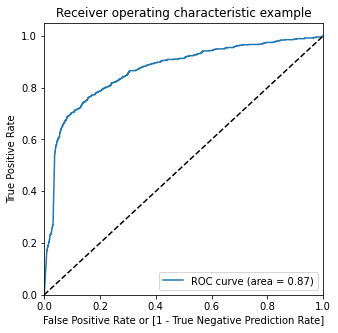

In [160]:
# ROC curve for the test DataFrame

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

In [161]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g'],
      dtype='object')
-----------------------Feature Importance--------------------
const                  1.831572
loc_og_t2m_mou_8     -19.779165
total_og_mou_8       -18.235249
loc_ic_t2f_mou_8     -50.743925
spl_ic_mou_8         -10.917183
last_day_rch_amt_8   -16.301135
total_rech_data_8    -23.990513
vol_2g_mb_8          -21.494358
monthly_2g_8          -7.584526
aug_vbc_3g           -21.017880
dtype: float64
